In [23]:
! pip install livelossplot

In [25]:
from keras.datasets import imdb
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics
from keras.callbacks import EarlyStopping
import livelossplot

In [39]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [6]:
print(x_train.shape)

(25000, 10000)


In [30]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [31]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=['accuracy']
)

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

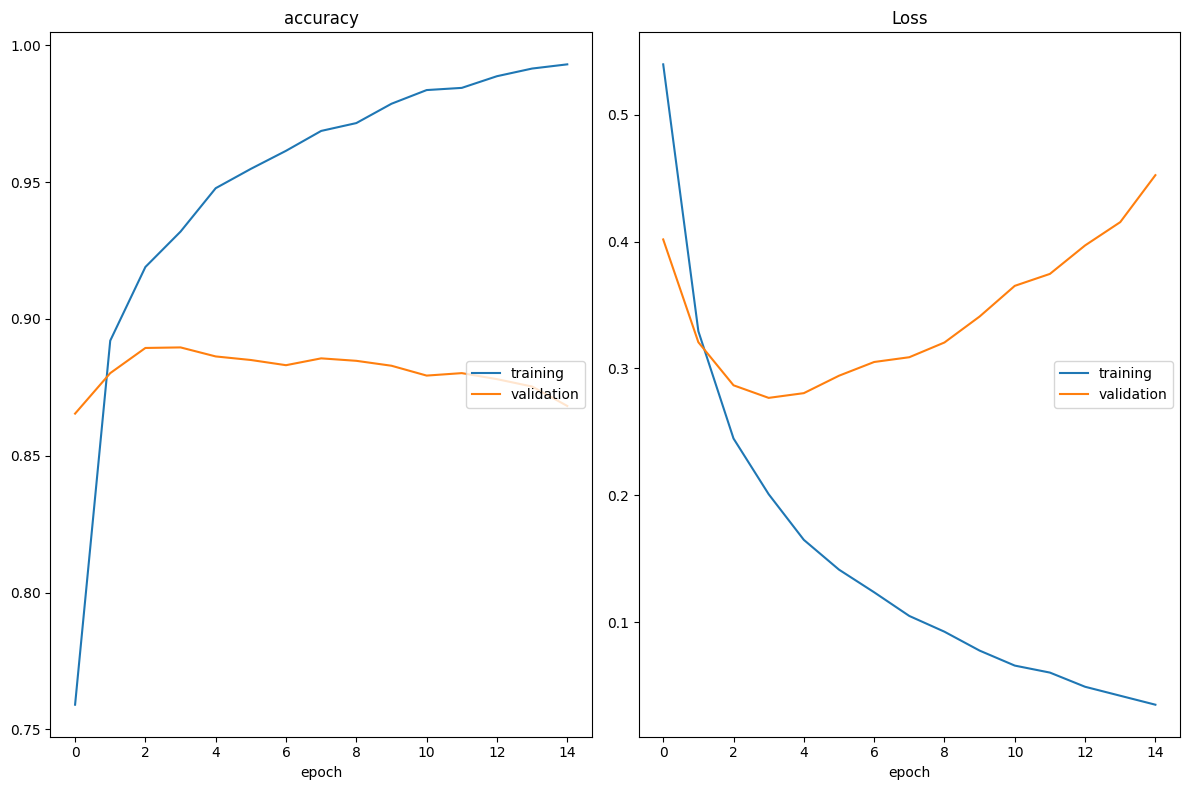

accuracy
	training         	 (min:    0.759, max:    0.993, cur:    0.993)
	validation       	 (min:    0.865, max:    0.890, cur:    0.868)
Loss
	training         	 (min:    0.035, max:    0.540, cur:    0.035)
	validation       	 (min:    0.277, max:    0.452, cur:    0.452)
30/30 [==============================] - 2s 53ms/step - loss: 0.0351 - accuracy: 0.9931 - val_loss: 0.4524 - val_accuracy: 0.8682


In [34]:
plot_losses = livelossplot.PlotLossesKeras()
estop = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, start_from_epoch=7, restore_best_weights=True)

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    callbacks=[plot_losses, estop],
    validation_data=(x_val, y_val)
)

In [35]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.3278 - accuracy: 0.8764
[0.3277718722820282, 0.8764399886131287]


In [36]:
loss = history.history['loss']
accu = history.history['accuracy']
v_loss = history.history['val_loss']
v_accu = history.history['val_accuracy']
for i in range(len(loss)):
    s = 'epochs: {:>2d}, loss: {:>7.3%}, accuracy: {:.3%},  val_loss: {:.3%}, val_accuracy: {:.3%}'.format((i+1), (loss[i]), (accu[i]), (v_loss[i]), (v_accu[i]))
    print(s)

epochs:  1, loss: 53.967%, accuracy: 75.900%,  val_loss: 40.171%, val_accuracy: 86.540%
epochs:  2, loss: 32.938%, accuracy: 89.207%,  val_loss: 32.070%, val_accuracy: 88.020%
epochs:  3, loss: 24.483%, accuracy: 91.900%,  val_loss: 28.676%, val_accuracy: 88.940%
epochs:  4, loss: 20.094%, accuracy: 93.193%,  val_loss: 27.685%, val_accuracy: 88.960%
epochs:  5, loss: 16.497%, accuracy: 94.780%,  val_loss: 28.058%, val_accuracy: 88.630%
epochs:  6, loss: 14.150%, accuracy: 95.487%,  val_loss: 29.431%, val_accuracy: 88.500%
epochs:  7, loss: 12.366%, accuracy: 96.147%,  val_loss: 30.512%, val_accuracy: 88.310%
epochs:  8, loss: 10.500%, accuracy: 96.873%,  val_loss: 30.888%, val_accuracy: 88.560%
epochs:  9, loss:  9.258%, accuracy: 97.160%,  val_loss: 32.050%, val_accuracy: 88.470%
epochs: 10, loss:  7.770%, accuracy: 97.867%,  val_loss: 34.095%, val_accuracy: 88.290%
epochs: 11, loss:  6.589%, accuracy: 98.367%,  val_loss: 36.513%, val_accuracy: 87.930%
epochs: 12, loss:  6.037%, accur

In [37]:
result = model.predict(x_test[0, :].reshape(1, 10000))
print(result)

1/1 [==============================] - 0s 116ms/step
[[0.18521348]]


In [38]:
model.save("model_9")